In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
from tools import *
from scipy import ndimage
from math import *

# Partie 1 : SIFT

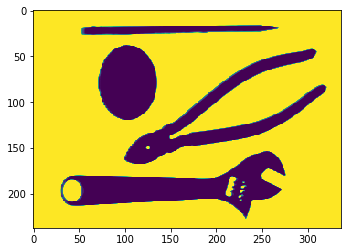

In [2]:
# example images
I = read_grayscale('data/tools.tiff')
I2 = read_grayscale('data/Scene/CALsuburb/image_0205.jpg')
plt.imshow(I)

In [3]:
def compute_grad(I):
    h_x = np.array([-0.5,0,0.5])
    h_y = np.array([0.5,1,0.5])
    Mx = conv_separable(I, h_y, h_x)
    My = conv_separable(I, h_x, h_y)
    Ix = ndimage.convolve(I, Mx)
    Iy = ndimage.convolve(I, My)
    return Ix, Iy

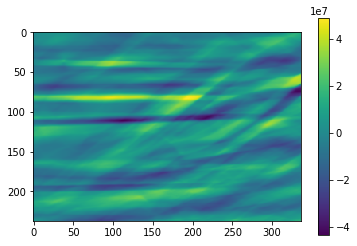

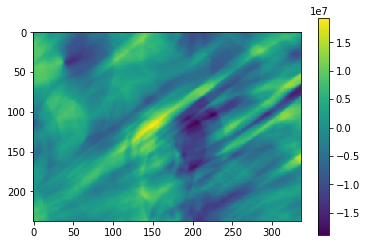

In [4]:
# example d'affichage du résultat
Ix, Iy = compute_grad(I)
plt.imshow(Ix)
plt.colorbar()
plt.show()
plt.imshow(Iy)
plt.colorbar()
plt.show()

In [5]:
def compute_grad_mod_ori(I):
    Ix, Iy = compute_grad(I)
    Gn = np.sqrt( Ix * Ix + Iy * Iy) 
    Go = compute_grad_ori(Ix, Iy, Gn)
    return Gn, Go

In [6]:
Gn, Go = compute_grad_mod_ori(I)

On va maintenant travailler sur un patch 

In [7]:
def extract_patch(I,xi,yj):
    patch=[]
    if xi+16 > len(I): 
        xi = xi - ((xi+16) % len(I))
    if yj+16 > len(I[0]): 
        yj = yj - ((yj+16) % len(I[0]))
    for i in range (xi,xi+16):
        patch.append(I[i][yj:yj+16])
    return np.asarray(patch)

def pond_patch(patch,sigma):
    m =np.mean(patch) 
    for i in range(patch.shape[0]): 
        for j in range(patch.shape[1]):  
            patch[i][j]= (1/(sigma*sqrt(2*pi)))*exp(-(((patch[i][j]-m)/(2*sigma))**2))
    return patch 

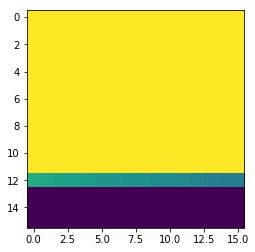

In [8]:
patch=extract_patch(I,5,150)
plt.imshow(patch)

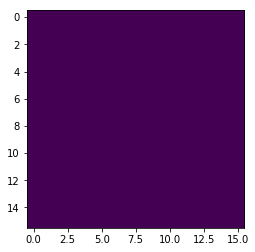

In [9]:
Gn, Go = compute_grad_mod_ori(patch)
Gn_pond=pond_patch(Gn,8)
plt.imshow(Gn_pond)

In [10]:
def extract_regions(patch):
    regs=[]
    for i in range(0,16,4):
        for k in range(i,i+4):
            reg=[]
            for j in range(0,16,4):
                reg.append(patch[k][j:j+4])
            regs.append(reg)
    return np.asarray(regs)

def construct_hist(Gn,Go):
    regions_pond = extract_regions(Gn)
    regions_orient = extract_regions(Go)
    Renc = np.zeros((16,8))
    for k in range(16):
        for j in range(8):
            Renc[k][j]=regions_pond[k][np.where(regions_orient[k] == j)].sum()
    return Renc.reshape(16*8)

def post_processing(Penc):
    
    if np.linalg.norm(Penc) < 0.5 : 
        return np.zeros(len(Penc))
    else: 
        #normaliser le vecteur 
        Penc /= np.linalg.norm(Penc)
    Penc = np.where(Penc <= 0.2 , Penc, 0.2) 
    Penc /= np.linalg.norm(Penc)
    return Penc 
        

In [11]:
Penc=construct_hist(Gn_pond,Go)

In [12]:
def compute_sift_region(Gn, Go, mask=None):
    # TODO
    Penc = construct_hist(Gn,Go)
    sift = post_processing(Penc)
    # Note: to apply the mask only when given, do:
    if mask is not None:
        width = 16 
        Gn_pond = pond_patch(Gn, mask*width)
        Penc = construct_hist(Gn_pond,Go)
        sift = post_processing(Penc)
    return sift

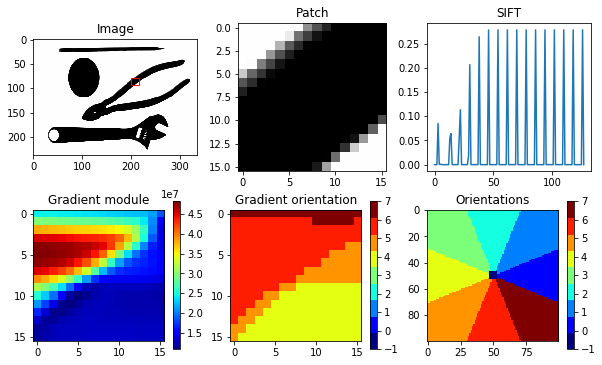

array([0.        , 0.        , 0.        , 0.0852436 , 0.00067765,
       0.00089194, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05460757, 0.06421417,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.059425  , 0.11363382, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01946854,
       0.20692169, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.26463762, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.27864771, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27898201,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.27898201, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.27898201, 0.        , 0.        , 0.        , 0.     

In [13]:
# Example of viz of SIFTs
# set gausm to True to apply mask weighting of gradients
display_sift_region(I,           compute_grad_mod_ori, compute_sift_region, x=200, y=78, gausm=False)
#display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
#display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
#display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=125, y=100, gausm=False)
#display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=121, y=121, gausm=False)
#display_sift_region(toy_im(),    compute_grad_mod_ori, compute_sift_region, x=95, y=95, gausm=False)

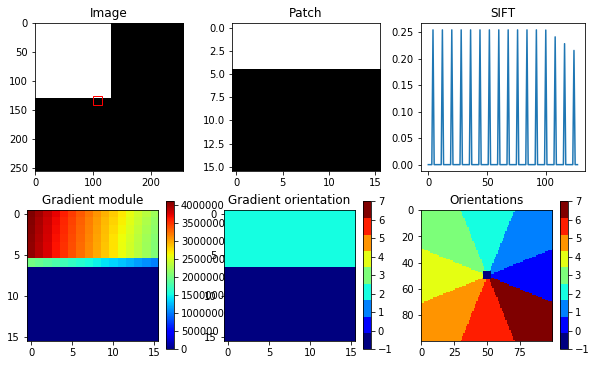

array([0.        , 0.        , 0.        , 0.        , 0.25466267,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.25466267, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.25466267, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.25466267, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.25466267, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.25466267,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.25466267, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.25466267, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.25466267, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)

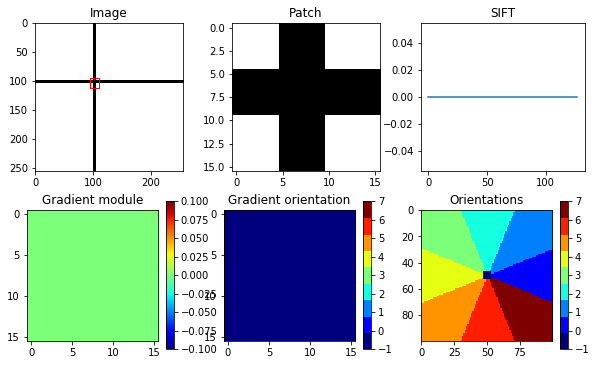

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
display_sift_region(toy_im(),    compute_grad_mod_ori, compute_sift_region, x=95, y=95, gausm=False)

In [16]:
def compute_sift_image(I):
    x, y = dense_sampling(I)
    im = auto_padding(I)
    # TODO calculs communs aux patchs
    sifts = np.zeros((len(x), len(y), 128))
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            patch = extract_patch(I,xi,yj)
            Gn,Go = compute_grad_mod_ori(patch)
            sifts[i, j, :] = compute_sift_region(Gn, Go, mask=None) # SIFT du patch de coordonnee (xi, yj)
    return sifts

In [17]:
sifts = compute_sift_image(I)

# Partie 2 : Dictionnaire visuel

In [18]:
# Ideally, restart the Python kernel to start from a clean slate
import os
import numpy as np
from tools import *
from sift import *
from sklearn.cluster import KMeans

In [19]:
# Paths config
dir_sc = os.path.join('data', 'Scene')
dir_sift = os.path.join('data', 'sift')
path_vdict = os.path.join('data', 'kmeans', 'vdict.npy')
path_vdsift = os.path.join('data', 'kmeans', 'vdsift.npy')
path_vdinames = os.path.join('data', 'kmeans', 'vdinames.npy')

inames, ilabls, cnames = load_dataset(dir_sc)

In [20]:
# If you want to look at the SIFTs that will be fed to compute_visual_dict:
sifts_list_by_image = compute_load_sift_dataset(dir_sc, dir_sift, inames, compute_sift_image)

Computing or loading SIFTs


In [21]:
# Code here the `compute_visual_dict` function
def compute_visual_dict(sift, n_clusters=50, n_init=1, verbose=1):
    # reorder data
    dim_sift = sift[0].shape[-1]
    sift = [s.reshape(-1, dim_sift) for s in sift]
    sift = np.concatenate(sift, axis=0)
    # remove zero vectors
    keep = ~np.all(sift==0, axis=1)
    sift = sift[keep]
    # randomly pick sift
    ids, _ = compute_split(sift.shape[0], pc=0.05)
    sift = sift[ids]
    
    # TODO compute kmeans on `sift`, get cluster centers, add zeros vector
    kmeans = KMeans(n_clusters, random_state=0).fit(sift)
    centers = kmeans.cluster_centers_
    centers =np.concatenate((centers, [np.zeros(len(centers[0]))]), axis=0)
    return centers 

In [22]:
# Run the visual dict computation (saved the first time)
vidct = compute_or_load_vdict(dir_sc, dir_sift, inames, compute_sift_image, path_vdict, compute_visual_dict)

Computing or loading visual dict


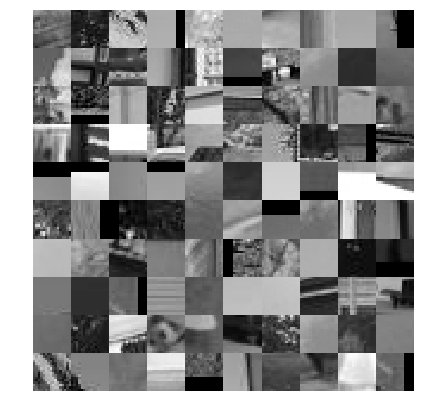

In [23]:
# Study of the dict
regions, sifts = get_regions_and_sifts(dir_sc, np.random.choice(inames, 30)) # Compute SIFT and regions from 30 random images
display_images(regions[np.random.choice(len(regions), 100)]) # Show 100 random regions


In [24]:

# TODO visually analyze the dict through similar example regions
#
# Ideally, create `vdregions`, a numpy array of size 1001 x 16 x 16 where each of the 1001 elements is a
# "prototype" patch that is very close to the cluster centerz

In [25]:
np.sum(np.array(([1,2],[4,3])),axis=0)

array([5, 5])

In [26]:
Penc=np.array([1,2,3,4])
n=np.linalg.norm(Penc)
np.linalg.norm(Penc/n)

0.9999999999999999

# Partie 3 : BoW

In [29]:
# Compute BoW for an image

def compute_feats(vdict, image_sifts):
    # TODO compute BoW from `image_sifts
    H=np.zeros((len(image_sifts),len(vdict)))
    for i,sift in enumerate(image_sifts):
        min_dist=1000
        for j,center in enumerate(vdict):
            dist=np.sum((sift-center)**2)
            if dist<min_dist:
                close_center=j
                min_dist=dist
        H[i,close_center]=1  
    z= np.sum(H,axis=0)   
    return z/np.linalg.norm(z)

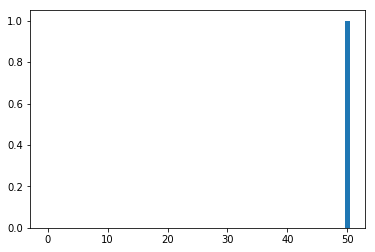

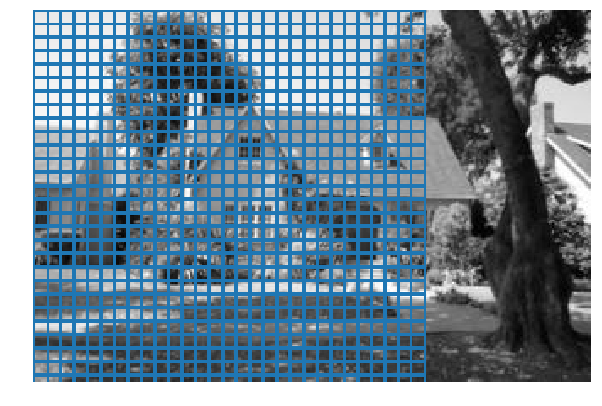

(9, 16, 16)


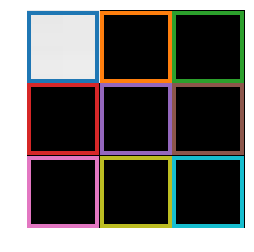

In [34]:
# Visualize your BoW on an image

iname = inames[0]
ipath = os.path.join(dir_sc, iname)
im = read_grayscale(ipath)
sift = compute_sift_image(im)
regions = compute_regions(im)
feats = compute_feats(vidct, sift)

display_vdregions_image(im, vidct, sift, feats, vdregions=None) # if you have vdregions, add it as input here

In [37]:
print(sift)
print(vidct[1][50])

[[[0.0387219  0.13065107 0.1787708  ... 0.         0.         0.        ]
  [0.         0.25121891 0.         ... 0.         0.         0.        ]
  [0.04483835 0.16663514 0.11076565 ... 0.         0.         0.        ]
  ...
  [0.07864614 0.21822804 0.06874033 ... 0.         0.         0.        ]
  [0.0165837  0.22780752 0.1488091  ... 0.         0.         0.        ]
  [0.0165837  0.22780752 0.1488091  ... 0.         0.         0.        ]]

 [[0.04054358 0.06097899 0.22617135 ... 0.         0.         0.        ]
  [0.20902936 0.15225429 0.         ... 0.         0.         0.        ]
  [0.15300474 0.21756016 0.         ... 0.         0.         0.        ]
  ...
  [0.17996032 0.13909632 0.12148115 ... 0.         0.         0.        ]
  [0.22078483 0.12618343 0.0637825  ... 0.         0.         0.        ]
  [0.22078483 0.12618343 0.0637825  ... 0.         0.         0.        ]]

 [[0.15584838 0.17405289 0.         ... 0.         0.         0.        ]
  [0.14131286 0.      

# TP3 

In [39]:
data = np.load("15_scenes_Xy.npz", "rb") 

In [41]:
len(data['X'])

4485

In [45]:
len(data['X'][0])

1001

In [43]:
data['y']

array([ 6,  6,  5, ...,  6, 13,  6])

In [46]:
train_ids, test_ids = compute_split(len(data['X']))
train_x = 